# Exercise 1: Train a Model from IRIS DB using Bayes Method

We create an ML model for classification of iris plants based on the size of their leaves, based on probabilities and Bayes theorem.

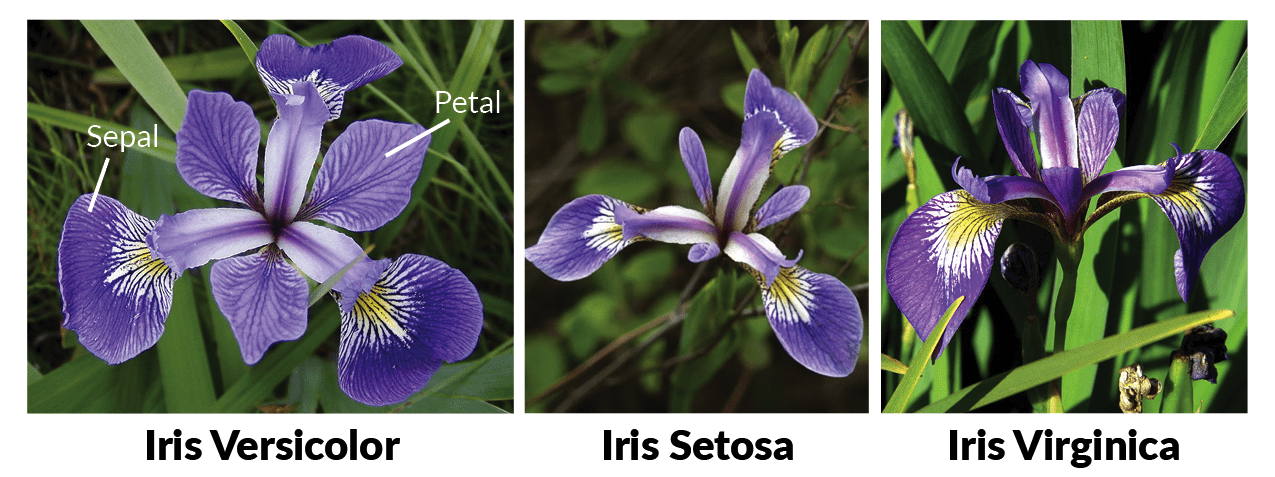

## Step 1: Load the libraries 

In [ ]:
# pandas to load data
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

## Step 2: Load a Dataset

What are sepals and petals?

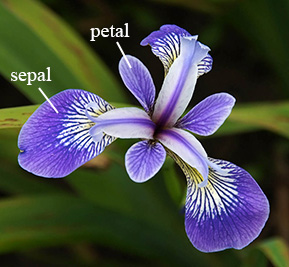

Use __pandas__ to load the data from a file or a datasets repository.<br>
It is a table data in csv format.<br>
Columns contain the size of the leaves of various iris flowers. <br>
Specify the names of each column before loading the data.<br>
Create a dataset object.

In [ ]:
# Load dataset from Internet
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

## Step 3: Get to Know Your Data

Investigate the dataset. <br>
Find out how many records are available, all they all clean, how many classes they represent. <br>
Create diagrams to visualize the set and its descriptive statistics.

In [ ]:
# See the shape and size 
dataset.shape

In [ ]:
# See how it looks (get the first 20 records)
dataset.tail(20)

In [ ]:
# See how many classes are included and how the records per class are distributed
# Group by class attribute
print(dataset.groupby('class').size())

In [ ]:
# Have the descriptive statistics calculated for the whole dataset
dataset.describe()

## Step 4: Visualize the Dataset Statistics
    1. Draw Box-Whisker Plots
    2. Draw Histograms
    3. Draw Multivariate Plots

### Box-Whisker Plot

In [ ]:
# Draw box-whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

See explanation of the box-whisker diagram

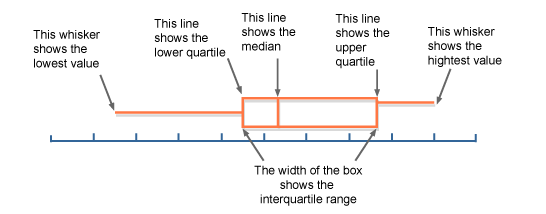

### Histograms

In [ ]:
# Draw histograms
dataset.hist()
plt.show()

These diagrams show the distribution of the values in the columns. <br>
Two of them seem to have Normal (Gaussian) distribution.<br> 
It is good to know, as we can later choose appropriate algorithms for exploitation.

### Multivariate Plots

In [ ]:
# Draw Multivariate Plots - scatterplots 
# These plots show the observed relationships between the attributes
scatter_matrix(dataset)
plt.show()

It can be helpful to find out structured relationships between input variables.
He we can spot some linear relationships.

## Step 5: Training
Now let's try to train a model.
1. Divide the dataset into X and y
2. Divide both into two subsets: training set and test set
3. Implement Bayes algorithm for training with the training sub-set
4. Estimate how accurate is the model with the test sub-set

### Split the Dataset

In [ ]:
# Convert the dataset into two arrays
array = dataset.values
# Create two (sub) arrays from it
X = array[:,0:4] # data without class
y = array[:,4]   # just class

In [ ]:
# Split the dataset into two: 
#   80% of it as training data
#   20% as a validation dataset
# Let Python split the set into four, we tell the proportion of splitting
test_set_size = 0.2

# Initial value for randomization
seed = 7
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_set_size, random_state=seed)


Now we have training data X_train and y_train and validation data X_test and y_test 

We are ready to apply algorithms for training a model from our data.
We try Gaussian Naive Bayes (NB).

### Choose a Method

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

In [ ]:
# Test on the test data, try prediction
prediction = model.predict(X_test)
prediction

In [ ]:
prediction.shape

## Step 6: Evaluation

We need a metrics for the model evaluation. <br>
The ‘accuracy‘ is the percentage [%] of correctly predicted instances from the total number of instances in the dataset.

In [ ]:
# Set the metrix
scoring = 'accuracy'

Now we can try the model on our validation set.

In [ ]:
prediction = model.predict(X_test)

In [ ]:
X_test

In [ ]:
# Calculated accuracy of the model over the validation set
print(accuracy_score(y_test, prediction))

In [ ]:
# Confusion matrix provides an indication of the the errors of prediction
print(confusion_matrix(y_test, prediction))

In [ ]:
# Classification report provides a breakdown of each class by precision, recall, f1-score and support
print(classification_report(y_test, prediction))

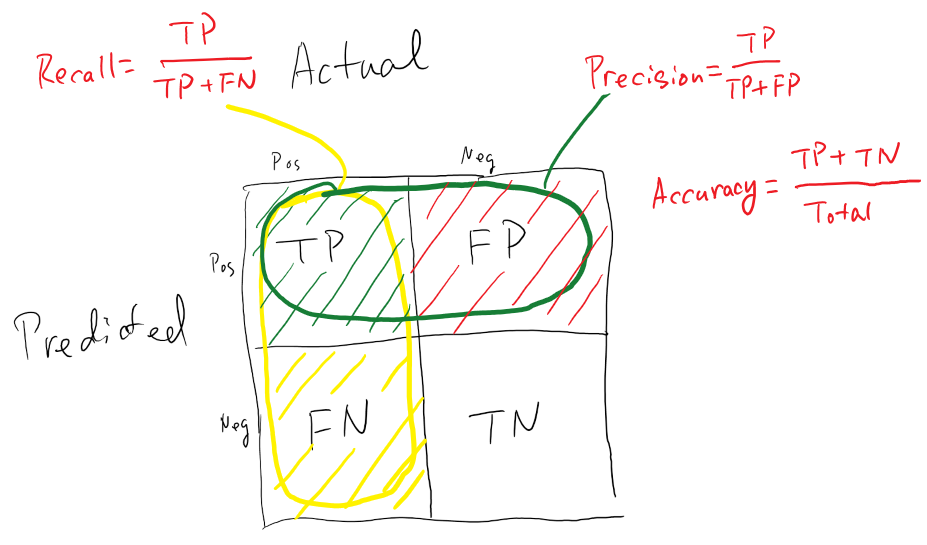

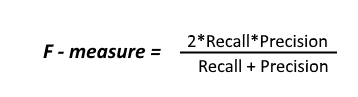

## Step 7: Testing

In [ ]:
# Testing with new data
# m = array[[[5] [3] [1] [0]]]
m = [[5.7,1.0,5.6,2.6]]
k = [[5.4, 3.7, 1.5, 0.2]]
my_prediction = model.predict(m)
my_prediction

In [ ]:
# Calculate the accuracy of the model with the test set
print(accuracy_score(y_test, prediction))

In [ ]:
# Evaluate classifier performance
from sklearn.metrics import classification_report
class_names = ['virginia', 'serosa', 'versicolor']
print("\n" + "#"*40)

In [ ]:
print("\nClassifier performance on training dataset\n")
print(classification_report(y_train, model.predict(X_train), target_names=class_names))
print("#"*40 + "\n")

In [ ]:
print("\nClassifier performance on test dataset\n")
print(classification_report(y_test, prediction, target_names=class_names))

The results are not perfect, f1-score differ in the two sub-sets.<br>
More methods can be tried.

## Step 8: Improvement

In [ ]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
# We store each trained model into array called models[]
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# See the various parameters of each model and their default values
#models

We will traing the models several times each, in randomly generated splits.<br>
A pseudo-random generator is used (in means, not totally random, but using a very large repeatable sequence of options). <br>
A seed is an initial value that is fed into the pseudo random number generator as a start of the process of random number generation. If it is not specified, it is selected randomly. As we want to use the same randomization procedure for our six trainings, we want to make it fixed and known. Then the results of different tests are directly comparable.

In [ ]:
# Give a fixed value for seed to be used in all tests
seed = 7

# Give fixed value for the number of repeted trainings of one model
num_repeat = 10

In [ ]:
# Set the metrix
scoring = 'accuracy'

In [ ]:
# Run all the algorithms and store their results in results[] and names in names[]
# For each we use the specific parameters preliminary stored in modelss[]
results = []
names = []
for name, model in models:
    # prepare randomization of splits
    kfold = model_selection.KFold(n_splits=num_repeat, random_state=seed, shuffle=True)
    
    # implement the model and calcilate a score based on 'accuracy' (scoring)
    cv_results = model_selection.cross_val_score(model, X_test, y_test, cv=kfold, scoring=scoring)
    
    # store the result of this method in array results[]
    results.append(cv_results)
    
    # store the name of this method in array names[]
    names.append(name)
    
    # tell what you have done so far
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)   
# repeat the same for next method

In [ ]:
# Compare algorithms frame
fig = plt.figure()
fig.suptitle('Algorithm Comparison')

# x axis includes sub-plots
ax = fig.add_subplot(111)

# y axis result values
plt.boxplot(results)

# x axis labels
ax.set_xticklabels(names)

plt.show()

In [ ]:
# Compare accuracy with KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

# Calculated accuracy of the model over the validation set
print(accuracy_score(y_test, predictions))

# Confusion matrix provides an indication of the three errors made ???? errors of predictions?
print(confusion_matrix(y_test, predictions))

# Classification report provides a breakdown of each class by precision, recall, f1-score and support ????
print(classification_report(y_test, predictions))